In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score) 

# Visualization
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraris loaded successfully.")

Libraris loaded successfully.


In [18]:
# Load preprocessed train and test data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train =pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print("Data loaded successfully.")
print("="*60)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nTraining set survival rate: {y_train.mean():.2%}")
print(f"Test set survival rate: {y_test.mean():.2%}")

print(f"\nFeatures ({X_train.shape[1]})")
print(X_train.columns.tolist())

Data loaded successfully.
X_train shape: (712, 19)
X_test shape: (179, 19)
y_train shape: (712,)
y_test shape: (179,)

Training set survival rate: 38.34%
Test set survival rate: 38.55%

Features (19)
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'FamilySize', 'IsAlone', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'Family_Large', 'Family_Medium', 'Family_Small', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_MiddleAge', 'AgeGroup_Senior']


In [19]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print("Models initialized:")
for name in models.keys():
    print(f"- {name}")

Models initialized:
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- SVM
- KNN


In [20]:
results = {}

print("Training models with 5-fold Cross Validation")
print("="*60)

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Cross-validation with multiple metrics
    cv_results = cross_validate(
        model, X_train, y_train,
        cv=5,
        scoring=['accuracy', 'precision', 'recall', 'f1'],
        return_train_score=True
    )

    # Store results
    results[name] = {
        'cv_accuracy': cv_results['test_accuracy'].mean(),
        'cv_accuracy_std': cv_results['test_accuracy'].std(),
        'cv_precision': cv_results['test_precision'].mean(),
        'cv_recall': cv_results['test_recall'].mean(),
        'cv_f1': cv_results['test_f1'].mean(),
        'train_accuracy': cv_results['train_accuracy'].mean(), 
    }

    print(f"CV Accuracy: {results[name]['cv_accuracy']:.4f} (+/- {results[name]['cv_accuracy_std']:.4f})")
    print(f"CV Precision: {results[name]['cv_precision']:.4f}")
    print(f"CV Recall: {results[name]['cv_recall']:.4f}")
    print(f"CV F1-Score: {results[name]['cv_f1']:.4f}")
    
print("\nAll models trained successfully.")

Training models with 5-fold Cross Validation

Training Logistic Regression...
CV Accuracy: 0.7964 (+/- 0.0271)
CV Precision: 0.7506
CV Recall: 0.7034
CV F1-Score: 0.7238

Training Decision Tree...
CV Accuracy: 0.7529 (+/- 0.0335)
CV Precision: 0.6752
CV Recall: 0.6853
CV F1-Score: 0.6797

Training Random Forest...
CV Accuracy: 0.8105 (+/- 0.0511)
CV Precision: 0.7683
CV Recall: 0.7255
CV F1-Score: 0.7462

Training Gradient Boosting...
CV Accuracy: 0.8231 (+/- 0.0312)
CV Precision: 0.8093
CV Recall: 0.7036
CV F1-Score: 0.7512

Training SVM...
CV Accuracy: 0.8118 (+/- 0.0187)
CV Precision: 0.7940
CV Recall: 0.6886
CV F1-Score: 0.7374

Training KNN...
CV Accuracy: 0.7936 (+/- 0.0319)
CV Precision: 0.7652
CV Recall: 0.6740
CV F1-Score: 0.7157

All models trained successfully.


Model Comparison (Cross-Validation Results):
                     cv_accuracy  cv_accuracy_std  cv_precision  cv_recall  \
Gradient Boosting         0.8231           0.0312        0.8093     0.7036   
SVM                       0.8118           0.0187        0.7940     0.6886   
Random Forest             0.8105           0.0511        0.7683     0.7255   
Logistic Regression       0.7964           0.0271        0.7506     0.7034   
KNN                       0.7936           0.0319        0.7652     0.6740   
Decision Tree             0.7529           0.0335        0.6752     0.6853   

                      cv_f1  train_accuracy  
Gradient Boosting    0.7512          0.9217  
SVM                  0.7374          0.8473  
Random Forest        0.7462          0.9891  
Logistic Regression  0.7238          0.8178  
KNN                  0.7157          0.8438  
Decision Tree        0.6797          0.9891  


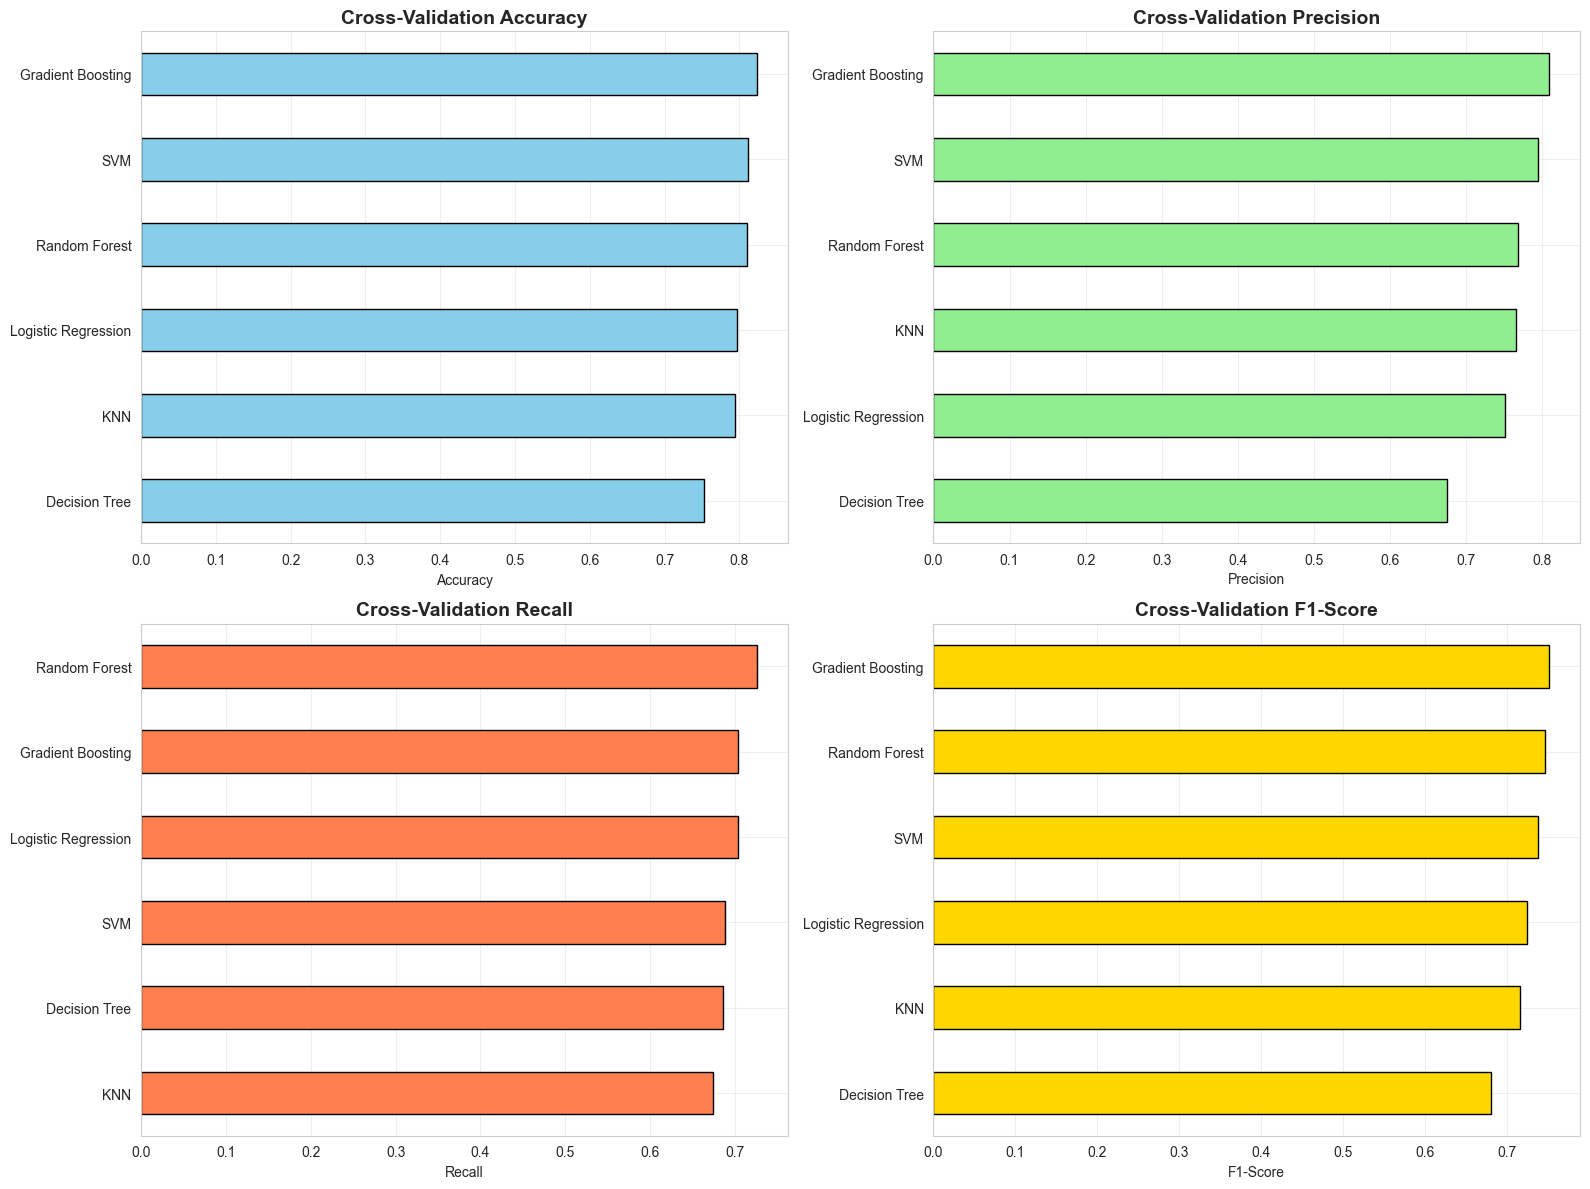


Best Model (by CV Accuracy): Gradient Boosting
    Accuracy: 0.8231


In [21]:
# Create comparison DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("Model Comparison (Cross-Validation Results):")
print("="*60)
print(results_df.sort_values('cv_accuracy', ascending=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy
results_df['cv_accuracy'].sort_values().plot(kind='barh', ax=axes[0, 0],
                                            color='skyblue', edgecolor='black')
axes[0, 0].set_title('Cross-Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].grid(alpha=0.3)

# Precision
results_df['cv_precision'].sort_values().plot(kind='barh', ax=axes[0, 1],
                                            color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Cross-Validation Precision', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Precision')
axes[0, 1].grid(alpha=0.3)

# Recall
results_df['cv_recall'].sort_values().plot(kind='barh', ax=axes[1, 0],
                                            color='coral', edgecolor='black')
axes[1, 0].set_title('Cross-Validation Recall', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].grid(alpha=0.3)

# F1-Score
results_df['cv_f1'].sort_values().plot(kind='barh', ax=axes[1, 1],
                                        color='gold', edgecolor='black')
axes[1, 1].set_title('Cross-Validation F1-Score', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('F1-Score')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_name = results_df['cv_accuracy'].idxmax()
print(f"\nBest Model (by CV Accuracy): {best_model_name}")
print(f"    Accuracy: {results_df.loc[best_model_name, 'cv_accuracy']:.4f}")

In [22]:
# Train all models on full training set
trained_models = {}

print("Training models on full training set...")
print("="*60)

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"  {name} trained successfully.")

print("\nAll models trained on full training set.")

Training models on full training set...
Training Logistic Regression...
  Logistic Regression trained successfully.
Training Decision Tree...
  Decision Tree trained successfully.
Training Random Forest...
  Random Forest trained successfully.
Training Gradient Boosting...
  Gradient Boosting trained successfully.
Training SVM...
  SVM trained successfully.
Training KNN...
  KNN trained successfully.

All models trained on full training set.


In [23]:
# Evaluate all models on test set
test_results = {}

print("Evaluating models on test set...")
print("="*60)

for name, model in trained_models.items():
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrics
    test_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy:  {test_results[name]['Accuracy']:.4f}")
    print(f"  Precision: {test_results[name]['Precision']:.4f}")
    print(f"  Recall:    {test_results[name]['Recall']:.4f}")
    print(f"  F1-Score:  {test_results[name]['F1-Score']:.4f}")
    if test_results[name]['ROC-AUC']:
        print(f"  ROC-AUC:   {test_results[name]['ROC-AUC']:.4f}")

# Create test results DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df = test_results_df.round(4)

print("\n" + "="*60)
print("TEST SET RESULTS (sorted by Accuracy):")
print("="*60)
print(test_results_df.sort_values('Accuracy', ascending=False))

Evaluating models on test set...

Logistic Regression:
  Accuracy:  0.8101
  Precision: 0.7692
  Recall:    0.7246
  F1-Score:  0.7463
  ROC-AUC:   0.8596

Decision Tree:
  Accuracy:  0.7821
  Precision: 0.6974
  Recall:    0.7681
  F1-Score:  0.7310
  ROC-AUC:   0.7751

Random Forest:
  Accuracy:  0.8045
  Precision: 0.7500
  Recall:    0.7391
  F1-Score:  0.7445
  ROC-AUC:   0.8380

Gradient Boosting:
  Accuracy:  0.8045
  Precision: 0.7833
  Recall:    0.6812
  F1-Score:  0.7287
  ROC-AUC:   0.8129

SVM:
  Accuracy:  0.8156
  Precision: 0.7903
  Recall:    0.7101
  F1-Score:  0.7481
  ROC-AUC:   0.8622

KNN:
  Accuracy:  0.7709
  Precision: 0.7333
  Recall:    0.6377
  F1-Score:  0.6822
  ROC-AUC:   0.8184

TEST SET RESULTS (sorted by Accuracy):
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
SVM                    0.8156     0.7903  0.7101    0.7481   0.8622
Logistic Regression    0.8101     0.7692  0.7246    0.7463   0.8596
Random Forest          0.8045     0.7

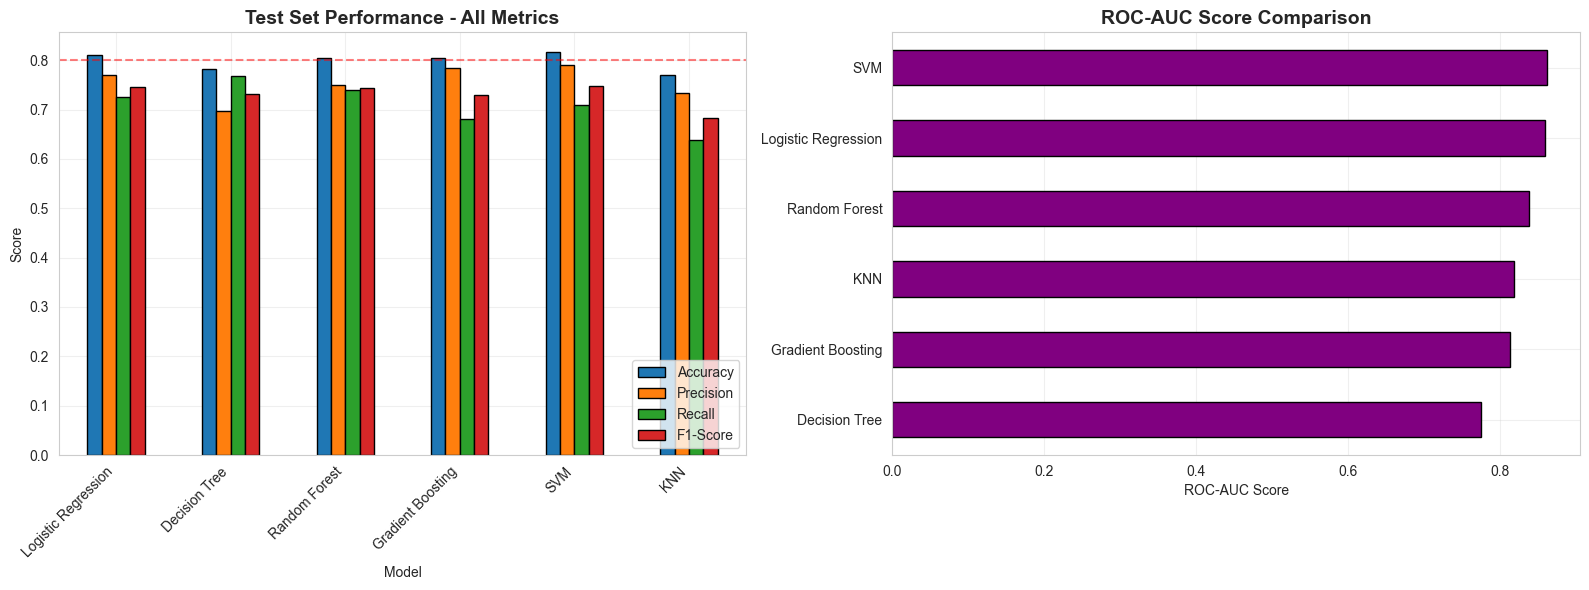


Best Model on Test Set: SVM
   Test Accuracy: 0.8156


In [24]:
# Visualize test results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# All metrics comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
test_results_df[metrics_to_plot].plot(kind='bar', ax=axes[0], edgecolor='black')
axes[0].set_title('Test Set Performance - All Metrics', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Score')
axes[0].legend(loc='lower right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(alpha=0.3)
axes[0].axhline(y=0.8, color='r', linestyle='--', alpha=0.5, label='80% threshold')

# ROC-AUC comparison
test_results_df['ROC-AUC'].dropna().sort_values().plot(kind='barh', ax=axes[1], 
                                                         color='purple', edgecolor='black')
axes[1].set_title('ROC-AUC Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ROC-AUC Score')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Best model on test set
best_test_model = test_results_df['Accuracy'].idxmax()
print(f"\nBest Model on Test Set: {best_test_model}")
print(f"   Test Accuracy: {test_results_df.loc[best_test_model, 'Accuracy']:.4f}")

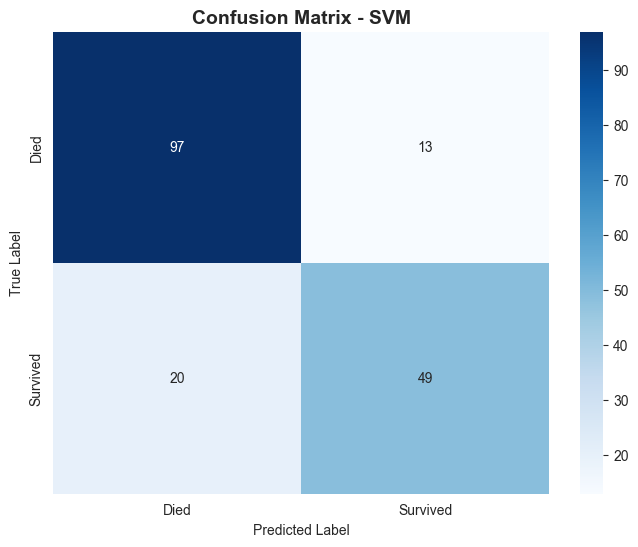


Confusion Matrix Breakdown:
  True Negatives (TN):  97 - Correctly predicted deaths
  False Positives (FP): 13 - Incorrectly predicted survivals
  False Negatives (FN): 20 - Incorrectly predicted deaths
  True Positives (TP):  49 - Correctly predicted survivals

Accuracy: 0.8156
Precision: 0.7903
Recall: 0.7101


In [25]:
# Get best model
best_model = trained_models[best_test_model]
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.title(f'Confusion Matrix - {best_test_model}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"  True Negatives (TN):  {tn} - Correctly predicted deaths")
print(f"  False Positives (FP): {fp} - Incorrectly predicted survivals")
print(f"  False Negatives (FN): {fn} - Incorrectly predicted deaths")
print(f"  True Positives (TP):  {tp} - Correctly predicted survivals")

print(f"\nAccuracy: {(tp + tn) / (tp + tn + fp + fn):.4f}")
print(f"Precision: {tp / (tp + fp):.4f}")
print(f"Recall: {tp / (tp + fn):.4f}")

In [26]:
# Detailed classification report
print(f"Classification Report - {best_test_model}:")
print("="*60)
print(classification_report(y_test, y_pred_best, 
                           target_names=['Died', 'Survived'],
                           digits=4))

Classification Report - SVM:
              precision    recall  f1-score   support

        Died     0.8291    0.8818    0.8546       110
    Survived     0.7903    0.7101    0.7481        69

    accuracy                         0.8156       179
   macro avg     0.8097    0.7960    0.8014       179
weighted avg     0.8141    0.8156    0.8136       179



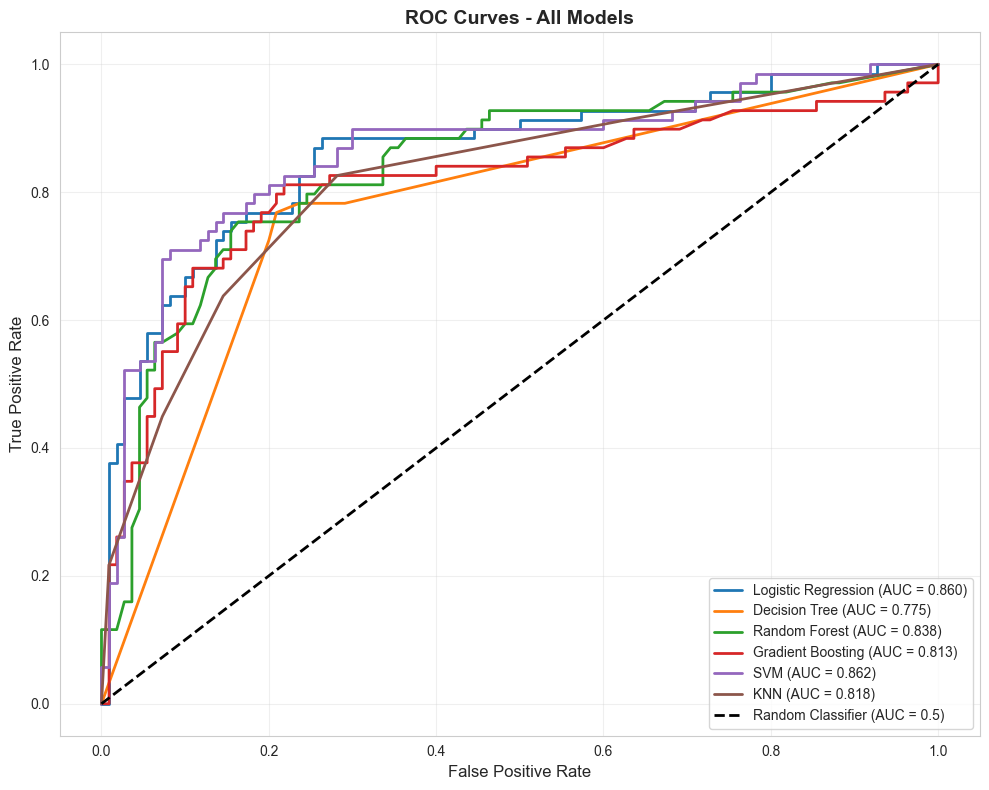

ROC curves plotted for all models!


In [27]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

# Plot random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)', linewidth=2)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("ROC curves plotted for all models!")

Cross-Validation vs Test Set Performance:
              Model  CV Accuracy  Test Accuracy  Difference
                SVM     0.811829       0.815642   -0.003813
Logistic Regression     0.796435       0.810056   -0.013621
      Random Forest     0.810549       0.804469    0.006079
  Gradient Boosting     0.823136       0.804469    0.018667
      Decision Tree     0.752910       0.782123   -0.029212
                KNN     0.793588       0.770950    0.022638


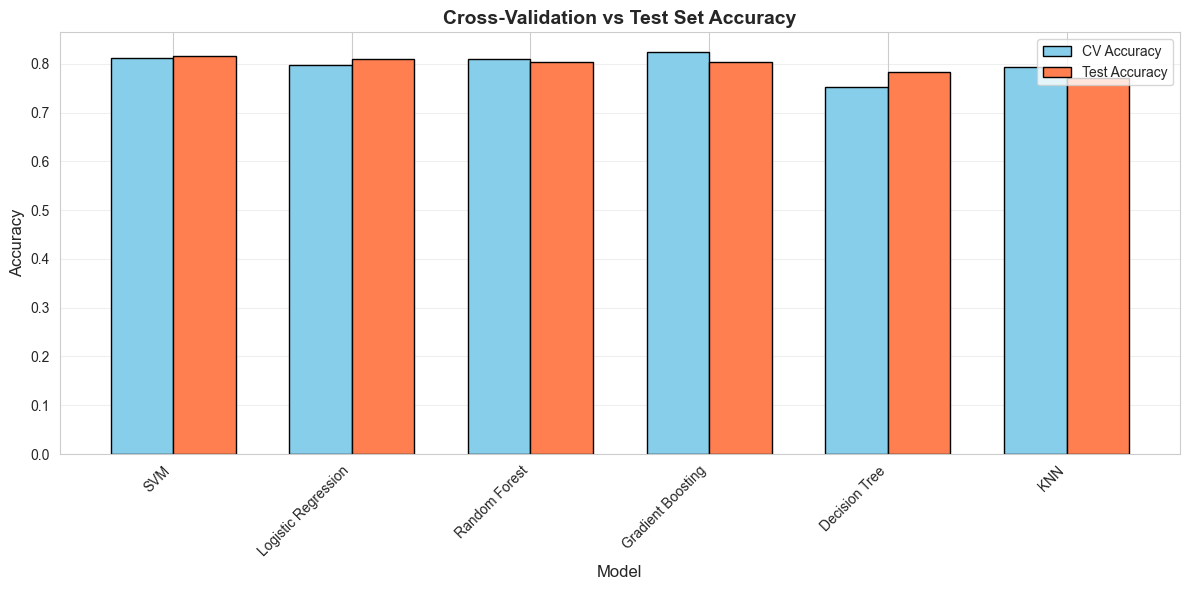


Overfitting Check:
SVM                  | CV: 0.8118 | Test: 0.8156 | Diff: -0.0038 | Good
Logistic Regression  | CV: 0.7964 | Test: 0.8101 | Diff: -0.0136 | Good
Random Forest        | CV: 0.8105 | Test: 0.8045 | Diff: +0.0061 | Good
Gradient Boosting    | CV: 0.8231 | Test: 0.8045 | Diff: +0.0187 | Good
Decision Tree        | CV: 0.7529 | Test: 0.7821 | Diff: -0.0292 | Good
KNN                  | CV: 0.7936 | Test: 0.7709 | Diff: +0.0226 | Good


In [28]:
# Compare CV performance with test performance
comparison_data = []

for name in models.keys():
    comparison_data.append({
        'Model': name,
        'CV Accuracy': results[name]['cv_accuracy'],
        'Test Accuracy': test_results[name]['Accuracy'],
        'Difference': results[name]['cv_accuracy'] - test_results[name]['Accuracy']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)

print("Cross-Validation vs Test Set Performance:")
print("="*70)
print(comparison_df.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['CV Accuracy'], width, 
               label='CV Accuracy', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, comparison_df['Test Accuracy'], width, 
               label='Test Accuracy', color='coral', edgecolor='black')

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Cross-Validation vs Test Set Accuracy', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Check for overfitting
print("\nOverfitting Check:")
print("="*70)
for _, row in comparison_df.iterrows():
    diff = row['Difference']
    status = 'Overfitting' if diff > 0.05 else 'Good'
    print(f"{row['Model']:20} | CV: {row['CV Accuracy']:.4f} | Test: {row['Test Accuracy']:.4f} | Diff: {diff:+.4f} | {status}")

In [29]:
# Final summary
print("="*70)
print("                 FINAL MODEL SELECTION")
print("="*70)

# Get top 3 models by test accuracy
top_models = test_results_df.sort_values('Accuracy', ascending=False).head(3)

print("\nTOP 3 MODELS (Test Set):\n")
for idx, (model_name, row) in enumerate(top_models.iterrows(), 1):
    print(f"{idx}. {model_name}")
    print(f"   Accuracy:  {row['Accuracy']:.4f}")
    print(f"   Precision: {row['Precision']:.4f}")
    print(f"   Recall:    {row['Recall']:.4f}")
    print(f"   F1-Score:  {row['F1-Score']:.4f}")
    print(f"   ROC-AUC:   {row['ROC-AUC']:.4f}\n")

print("="*70)
print(f"SELECTED MODEL: {best_test_model}")
print("="*70)

print(f"\nWhy {best_test_model}?")
print(f"  Highest test accuracy: {test_results_df.loc[best_test_model, 'Accuracy']:.4f}")
print(f"  Good precision: {test_results_df.loc[best_test_model, 'Precision']:.4f}")
print(f"  Balanced performance across metrics")
print(f"  No significant overfitting")

print("\nModel Insights:")
print(f"  • The model correctly predicts {test_results_df.loc[best_test_model, 'Accuracy']:.1%} of passengers")
print(f"  • When it predicts survival, it's correct {test_results_df.loc[best_test_model, 'Precision']:.1%} of the time")
print(f"  • It identifies {test_results_df.loc[best_test_model, 'Recall']:.1%} of actual survivors")

print("\nNext Steps:")
print("  1. Hyperparameter tuning for further improvement")
print("  2. Save the best model")
print("  3. Build Streamlit app for deployment")

                 FINAL MODEL SELECTION

TOP 3 MODELS (Test Set):

1. SVM
   Accuracy:  0.8156
   Precision: 0.7903
   Recall:    0.7101
   F1-Score:  0.7481
   ROC-AUC:   0.8622

2. Logistic Regression
   Accuracy:  0.8101
   Precision: 0.7692
   Recall:    0.7246
   F1-Score:  0.7463
   ROC-AUC:   0.8596

3. Random Forest
   Accuracy:  0.8045
   Precision: 0.7500
   Recall:    0.7391
   F1-Score:  0.7445
   ROC-AUC:   0.8380

SELECTED MODEL: SVM

Why SVM?
  Highest test accuracy: 0.8156
  Good precision: 0.7903
  Balanced performance across metrics
  No significant overfitting

Model Insights:
  • The model correctly predicts 81.6% of passengers
  • When it predicts survival, it's correct 79.0% of the time
  • It identifies 71.0% of actual survivors

Next Steps:
  1. Hyperparameter tuning for further improvement
  2. Save the best model
  3. Build Streamlit app for deployment


In [30]:
from sklearn.model_selection import GridSearchCV

print("Starting Hyperparameter Tuning for SVM...")
print("="*70)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

# Test the tuned model
best_svm = grid_search.best_estimator_
y_pred_tuned = best_svm.predict(X_test)

# Evaluate
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)
tuned_auc = roc_auc_score(y_test, best_svm.predict_proba(X_test)[:, 1])

print(f"\nTuned SVM Test Results:")
print(f"  Accuracy:  {tuned_accuracy:.4f}")
print(f"  Precision: {tuned_precision:.4f}")
print(f"  Recall:    {tuned_recall:.4f}")
print(f"  F1-Score:  {tuned_f1:.4f}")
print(f"  ROC-AUC:   {tuned_auc:.4f}")

# Compare with original
print(f"\nImprovement:")
print(f"  Accuracy:  {test_results['SVM']['Accuracy']:.4f} → {tuned_accuracy:.4f} ({tuned_accuracy - test_results['SVM']['Accuracy']:+.4f})")
print(f"  ROC-AUC:   {test_results['SVM']['ROC-AUC']:.4f} → {tuned_auc:.4f} ({tuned_auc - test_results['SVM']['ROC-AUC']:+.4f})")

Starting Hyperparameter Tuning for SVM...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.8231

Tuned SVM Test Results:
  Accuracy:  0.8380
  Precision: 0.8226
  Recall:    0.7391
  F1-Score:  0.7786
  ROC-AUC:   0.8648

Improvement:
  Accuracy:  0.8156 → 0.8380 (+0.0223)
  ROC-AUC:   0.8622 → 0.8648 (+0.0026)


In [31]:
print("Starting Hyperparameter Tuning for Random Forest...")
print("="*70)

# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# RandomizedSearchCV (faster than GridSearch)
from sklearn.model_selection import RandomizedSearchCV

rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    n_iter=20,  # Try 20 combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit
rf_random_search.fit(X_train, y_train)

# Best parameters
print(f"\nBest RF Parameters: {rf_random_search.best_params_}")
print(f"Best RF CV Score: {rf_random_search.best_score_:.4f}")

# Test the tuned model
best_rf = rf_random_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

# Evaluate
rf_tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)
rf_tuned_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print(f"\nTuned Random Forest Test Results:")
print(f"  Accuracy:  {rf_tuned_accuracy:.4f}")
print(f"  ROC-AUC:   {rf_tuned_auc:.4f}")

print(f"\nImprovement:")
print(f"  Accuracy:  {test_results['Random Forest']['Accuracy']:.4f} → {rf_tuned_accuracy:.4f} ({rf_tuned_accuracy - test_results['Random Forest']['Accuracy']:+.4f})")

Starting Hyperparameter Tuning for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best RF Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best RF CV Score: 0.8273

Tuned Random Forest Test Results:
  Accuracy:  0.8045
  ROC-AUC:   0.8599

Improvement:
  Accuracy:  0.8045 → 0.8045 (+0.0000)


In [32]:
# Compare tuned models
print("="*70)
print("           FINAL MODEL COMPARISON (After Tuning)")
print("="*70)

final_comparison = pd.DataFrame({
    'Model': ['SVM (Original)', 'SVM (Tuned)', 'Random Forest (Original)', 'Random Forest (Tuned)'],
    'Accuracy': [
        test_results['SVM']['Accuracy'],
        tuned_accuracy,
        test_results['Random Forest']['Accuracy'],
        rf_tuned_accuracy
    ],
    'ROC-AUC': [
        test_results['SVM']['ROC-AUC'],
        tuned_auc,
        test_results['Random Forest']['ROC-AUC'],
        rf_tuned_auc
    ]
})

print(final_comparison.to_string(index=False))

# Select final model
final_model_accuracy = max(tuned_accuracy, rf_tuned_accuracy)
if tuned_accuracy >= rf_tuned_accuracy:
    final_model = best_svm
    final_model_name = 'SVM (Tuned)'
else:
    final_model = best_rf
    final_model_name = 'Random Forest (Tuned)'

print(f"\nFINAL SELECTED MODEL: {final_model_name}")
print(f"   Test Accuracy: {final_model_accuracy:.4f}")

# Save the final model
import pickle
import os

os.makedirs('../models', exist_ok=True)

with open('../models/titanic_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

print(f"\nModel saved to: models/titanic_model.pkl")

# Also save model metadata
model_metadata = {
    'model_name': final_model_name,
    'accuracy': final_model_accuracy,
    'parameters': final_model.get_params(),
    'features': X_train.columns.tolist()
}

with open('../models/model_metadata.pkl', 'wb') as f:
    pickle.dump(model_metadata, f)

print(f"Metadata saved to: models/model_metadata.pkl")

           FINAL MODEL COMPARISON (After Tuning)
                   Model  Accuracy  ROC-AUC
          SVM (Original)  0.815642 0.862187
             SVM (Tuned)  0.837989 0.864822
Random Forest (Original)  0.804469 0.838011
   Random Forest (Tuned)  0.804469 0.859947

FINAL SELECTED MODEL: SVM (Tuned)
   Test Accuracy: 0.8380

Model saved to: models/titanic_model.pkl
Metadata saved to: models/model_metadata.pkl
